In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
billboard = pd.read_csv('secondary_data/billboard_lyrics.csv', encoding = "ISO-8859-1")
billboard.drop(['Source'], axis=1, inplace=True)
billboard = billboard.replace(r'^\s*$', np.nan, regex=True)
billboard = billboard.dropna()
billboard= billboard.reset_index(drop=True)
billboard.columns = billboard.columns.str.lower()
billboard.to_csv('secondary_data/billboard_cleaned.csv', index=False, encoding='utf-8')
billboard.head(5)

,rank,song,artist,year,lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
2,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
3,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...
4,6,downtown,petula clark,1965,when youre alone and life is making you lonel...


In [3]:
dataset = pd.read_csv('data/data.csv')
dataset.rename(columns={'name': 'track_name', 'artists': 'artist_name'}, inplace=True)
dataset.head(5)

,valence,year,acousticness,artist_name,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,track_name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
dataset.info()
total_entries = dataset.count().sum()
print(total_entries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artist_name       170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  track_name        170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
# Convert 'release_date' column to int type
dataset['release_year'] = pd.to_datetime(dataset['release_date']).dt.year

# Compare the years between "release_year" and "year" columns
mismatch_count = sum(dataset['release_year'] != dataset['year'])
mismatch_count


0

In [6]:
dataset = pd.get_dummies(dataset, columns=['key'], drop_first=True)

In [7]:
dataset['duration_min'] = dataset['duration_ms'] / 60000

# Drop the 'milliseconds' column
dataset.drop('duration_ms', axis=1, inplace=True)

In [8]:
dataset

,valence,year,acousticness,artist_name,danceability,energy,explicit,id,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,0.6650,...,0,0,0,0,0,0,0,1,0,13.861117
1,0.9630,1921,0.73200,['Dennis Day'],0.819,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,0.1600,...,0,0,0,0,1,0,0,0,0,3.008883
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,0.1010,...,1,0,0,0,0,0,0,0,0,8.334367
3,0.1650,1921,0.96700,['Frank Parker'],0.275,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,0.3810,...,0,0,1,0,0,0,0,0,0,3.500000
4,0.2530,1921,0.95700,['Phil Regan'],0.418,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,0.2290,...,1,0,0,0,0,0,0,0,0,2.778217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,0.0822,...,0,0,0,0,1,0,0,0,0,5.028567
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,0.1010,...,0,0,0,0,1,0,0,0,0,2.510900
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,0.2580,...,0,1,0,0,0,0,0,0,0,3.521333
170651,0.1950,2020,0.00998,['Eminem'],0.671,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,0.6430,...,0,0,0,0,0,0,0,0,0,5.619117


In [9]:
dataset = dataset.drop_duplicates(subset='id', keep='first')
dataset = dataset.dropna()
dataset = dataset.sort_values('popularity', ascending=False)
dataset = dataset.reset_index(drop=True)
dataset.head(5)

,valence,year,acousticness,artist_name,danceability,energy,explicit,id,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min
0,0.145,2020,0.4010,"['Bad Bunny', 'Jhay Cortez']",0.731,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,0.1130,...,0,1,0,0,0,0,0,0,0,3.418167
1,0.756,2020,0.2210,"['24kGoldn', 'iann dior']",0.700,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,0.2720,...,0,0,0,0,1,0,0,0,0,2.342100
2,0.737,2020,0.0112,['BTS'],0.746,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,0.0936,...,0,0,0,1,0,0,0,0,0,3.317567
3,0.357,2020,0.0194,"['Cardi B', 'Megan Thee Stallion']",0.935,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,0.0824,...,0,0,0,0,0,0,0,0,0,3.125683
4,0.682,2020,0.4680,['Ariana Grande'],0.737,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0.0931,...,0,0,0,0,0,0,0,0,0,2.872083


In [10]:
dataset.info()
total_entries = dataset.count().sum()
print(total_entries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artist_name       170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   id                170653 non-null  object 
 8   instrumentalness  170653 non-null  float64
 9   liveness          170653 non-null  float64
 10  loudness          170653 non-null  float64
 11  mode              170653 non-null  int64  
 12  track_name        170653 non-null  object 
 13  popularity        170653 non-null  int64  
 14  release_date      170653 non-null  object 
 15  speechiness       170653 non-null  float64
 16  tempo             17

In [11]:
dataset.describe()

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,...,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,0.482389,0.084575,0.167010,0.205839,-11.467990,0.706902,...,0.042759,0.075785,0.096277,0.051221,0.121902,0.062999,0.102963,0.071185,0.062525,3.849139
std,0.263171,25.917853,0.376032,0.176138,0.267646,0.278249,0.313475,0.174805,5.697943,0.455184,...,0.202315,0.264655,0.294972,0.220449,0.327174,0.242962,0.303912,0.257135,0.242107,2.101974
min,0.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085133
25%,0.317000,1956.000000,0.102000,0.415000,0.255000,0.000000,0.000000,0.098800,-14.615000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.830450
50%,0.540000,1977.000000,0.516000,0.548000,0.471000,0.000000,0.000216,0.136000,-10.580000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.457783
75%,0.747000,1999.000000,0.893000,0.668000,0.703000,0.000000,0.102000,0.261000,-7.183000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.373333
max,1.000000,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,1.000000,3.855000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.058333


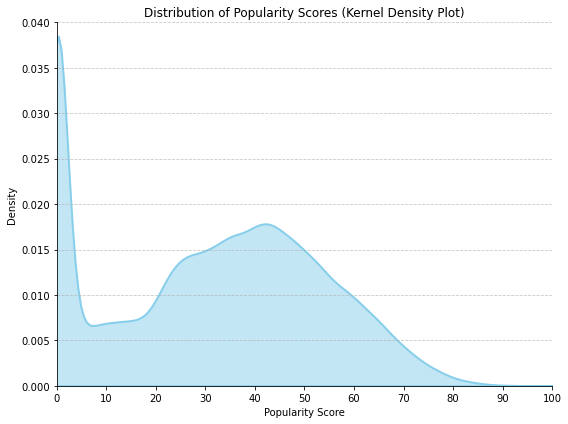

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the kernel density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(dataset['popularity'], color='skyblue', fill=True, alpha=0.5, linewidth=2)
plt.xlabel('Popularity Score')
plt.ylabel('Density')
plt.title('Distribution of Popularity Scores (Kernel Density Plot)')

# Customize the plot
sns.despine()  # Remove the spines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.xticks(range(0, 101, 10))  # Set x-axis ticks
plt.xlim(0, 100)  # Set x-axis limits
plt.ylim(0, 0.04)  # Set y-axis limits
plt.tight_layout()  # Adjust spacing between subplots

# Show the plot
plt.show()

In [13]:
import re
# Preprocess the strings in both dataframes
dataset['track_name_processed'] = dataset['track_name'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
dataset['artist_name_processed'] = dataset['artist_name'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
billboard['song_processed'] = billboard['song'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
billboard['artist_processed'] = billboard['artist'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Create a set of processed song-artist tuples in the billboard dataframe
billboard_songs = set(zip(billboard['song_processed'], billboard['artist_processed']))

# Assign True/False based on the match
dataset['is_billboard'] = dataset.apply(lambda row: (row['track_name_processed'], row['artist_name_processed']) in billboard_songs, axis=1)

In [14]:
true_count = dataset['is_billboard'].sum()
matches = list(zip(dataset.loc[dataset['is_billboard'], 'track_name'], dataset.loc[dataset['is_billboard'], 'artist_name']))
dataset = dataset.drop(columns=['track_name_processed', 'artist_name_processed'], axis=1)
print(true_count)

4530


In [15]:
dataset['label'] = 0

In [16]:
dataset1 = dataset.copy()
dataset1.loc[dataset1['popularity'] >= 1, 'label'] = 1

dataset34 = dataset.copy()
dataset34.loc[dataset34['popularity'] >= 34, 'label'] = 1

dataset50 = dataset.copy()
dataset50.loc[dataset50['popularity'] >= 50, 'label'] = 1

In [17]:
count1 = dataset1['label'].value_counts()
count34 = dataset34['label'].value_counts()
count50 = dataset50['label'].value_counts()
print(count1, count34, count50)

1    142761
0     27892
Name: label, dtype: int64 0    85397
1    85256
Name: label, dtype: int64 0    131882
1     38771
Name: label, dtype: int64


In [18]:

df1 = dataset1.drop(columns=['popularity','artist_name', 'id', 'track_name', 'release_date'], axis=1)
df34 = dataset34.drop(columns=['popularity','artist_name', 'id', 'track_name', 'release_date'], axis=1)
df50 = dataset50.drop(columns=['popularity','artist_name', 'id', 'track_name', 'release_date'], axis=1)


In [19]:
df1.to_csv('to_analyze1.csv', index=False, encoding='utf-8')
df34.to_csv('to_analyze34.csv', index=False, encoding='utf-8')
df50.to_csv('to_analyze50.csv', index=False, encoding='utf-8')